PREPROCESSING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_train = pd.read_csv('adult.data',header = None)
print(df_train.count())
df_train.head()

0     32561
1     32561
2     32561
3     32561
4     32561
5     32561
6     32561
7     32561
8     32561
9     32561
10    32561
11    32561
12    32561
13    32561
14    32561
dtype: int64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
df_train.columns = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race',
                   'sex','capital_gain','capital_loss','hours_per_week','native_country','income_flag']
df_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_flag
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df_train.income_flag.unique()

array([' <=50K', ' >50K'], dtype=object)

In [4]:
df_train['income_flag'] = np.where(df_train['income_flag'] == ' <=50K',0,1)
df_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_flag
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [5]:
df_train.income_flag.unique()

array([0, 1])

In [6]:
for col in df_train.columns:
    print(col)
    print(df_train[col].unique())

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
fnlwgt
[ 77516  83311 215646 ...  34066  84661 257302]
education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
education_num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital_status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-o

In [7]:
df_train.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_flag
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [8]:
for col in df_train.columns:
    print(f'{col}: '+ str(df_train[df_train[col]== ' ?'][col].count()))

age: 0
workclass: 1836
fnlwgt: 0
education: 0
education_num: 0
marital_status: 0
occupation: 1843
relationship: 0
race: 0
sex: 0
capital_gain: 0
capital_loss: 0
hours_per_week: 0
native_country: 583
income_flag: 0


In [9]:
df_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_flag       0
dtype: int64

In [10]:
ques_cols = ['workclass','occupation','native_country']
for col in ques_cols:
    df_train[col] = np.where(df_train[col]== ' ?',999,df_train[col])
df_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_flag       0
dtype: int64

In [11]:
df_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_flag
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [12]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [13]:
df_train['sex'] = np.where(df_train['sex'] == ' Female',1,0)

#df_train['race'] = df_train['race'].map({'White':0,'Asian-Pac-Islander':1,'Amer-Indian-Eskimo':2,'Other':3,'Black':4})

df_train['race'].replace({' White':0,' Asian-Pac-Islander':1,' Amer-Indian-Eskimo':2,' Other':3,' Black':4},inplace = True)

df_train['native_country'].replace({' United-States': 0,' Cambodia': 1,' England': 2,' Puerto-Rico': 3,' Canada': 4,' Germany': 5,
                         ' Outlying-US(Guam-USVI-etc)': 6,' India': 7,' Japan': 8,' Greece': 9,' South': 10,' China': 11,
                         ' Cuba': 12,' Iran': 13,' Honduras': 14,' Philippines': 15,' Italy': 16,' Poland': 17,' Jamaica': 18,
                         ' Vietnam': 19,' Mexico': 20,' Portugal': 21,' Ireland': 22,' France': 23,' Dominican-Republic': 24,
                         ' Laos': 25,' Ecuador': 26,' Taiwan': 27,' Haiti': 28,' Columbia': 29,' Hungary': 30,' Guatemala': 31,
                         ' Nicaragua': 32,' Scotland': 33,' Thailand': 34,' Yugoslavia': 35,' El-Salvador': 36,
                         ' Trinadad&Tobago': 37,' Peru': 38,' Hong': 39,' Holand-Netherlands': 40},inplace = True)

df_train['marital_status'].replace({' Never-married':0, ' Married-civ-spouse':1, ' Divorced':2,
 ' Married-spouse-absent':3, ' Separated':4, ' Married-AF-spouse':5, ' Widowed':6},inplace = True)

df_train['occupation'].replace({' Adm-clerical': 0, ' Exec-managerial': 1, ' Handlers-cleaners': 2, ' Prof-specialty': 3,
 ' Other-service': 4, ' Sales': 5, ' Craft-repair': 6, ' Transport-moving': 7,
 ' Farming-fishing': 8, ' Machine-op-inspct': 9, ' Tech-support': 10,
 ' Protective-serv': 11, ' Armed-Forces': 12, ' Priv-house-serv': 13},inplace = True)
df_train['relationship'].replace({' Not-in-family': 0, ' Husband': 1, ' Wife': 2, ' Own-child': 3, ' Unmarried': 4,
 ' Other-relative': 5},inplace = True)

df_train['workclass'].replace({' State-gov': 0, ' Self-emp-not-inc': 1, ' Private': 2, ' Federal-gov': 3, ' Local-gov': 4,
                              ' Self-emp-inc': 5,' Without-pay': 6, ' Never-worked': 7},inplace = True)
df_train['workclass'] = df_train['workclass'].astype('int')


for col in df_train.columns:
    print(col)
    print(df_train[col].unique())

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass
[  0   1   2   3   4 999   5   6   7]
fnlwgt
[ 77516  83311 215646 ...  34066  84661 257302]
education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
education_num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital_status
[0 1 2 3 4 5 6]
occupation
[  0   1   2   3   4   5   6   7   8   9  10 999  11  12  13]
relationship
[0 1 2 3 4 5]
race
[0 4 1 2 3]
sex
[0 1]
capital_gain
[ 2174     0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386
  7298  1409  3674  1055  3464  2050  2176   594 20051  6849  4101  1111
  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
  3471  4865 99999

In [14]:
#df_train['age'] = (df_train['age']/10).astype('int')
#df_train['education_num'] = (df_train['education_num']/4).astype('int')
df_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_flag
0,39,0,77516,Bachelors,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,Bachelors,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,HS-grad,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,11th,7,1,2,1,4,0,0,0,40,0,0
4,28,2,338409,Bachelors,13,1,3,2,4,1,0,0,40,12,0


<AxesSubplot:>

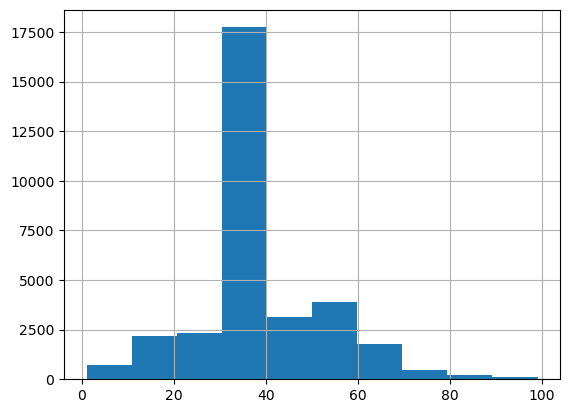

In [15]:
df_train['hours_per_week'].hist()

<AxesSubplot:>

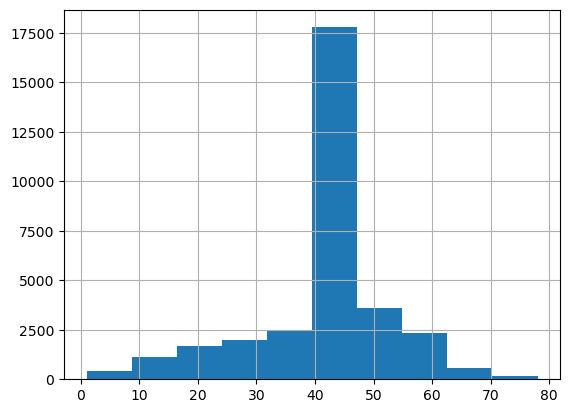

In [16]:
df_train = df_train[df_train['hours_per_week']<80]
df_train['hours_per_week'].hist()

<AxesSubplot:>

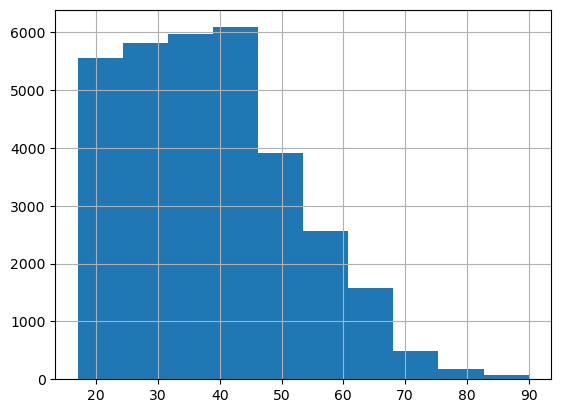

In [17]:
df_train['age'].hist()

<AxesSubplot:>

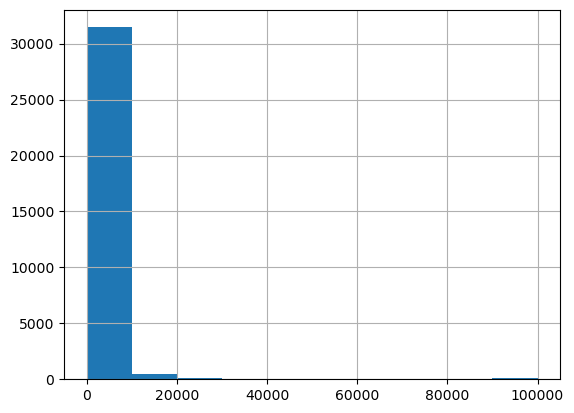

In [18]:
df_train['capital_gain'].hist()

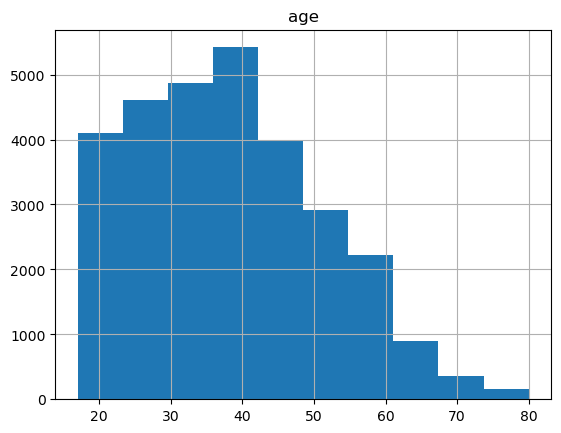

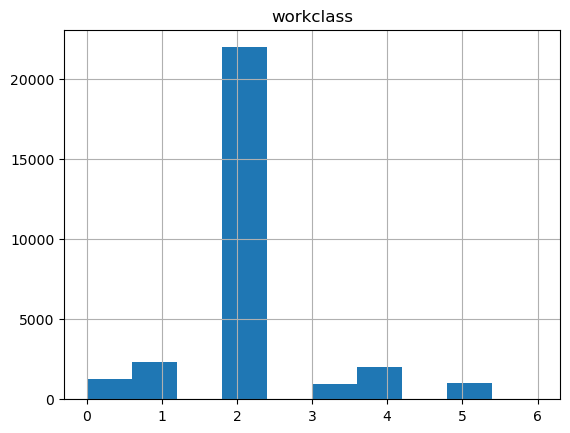

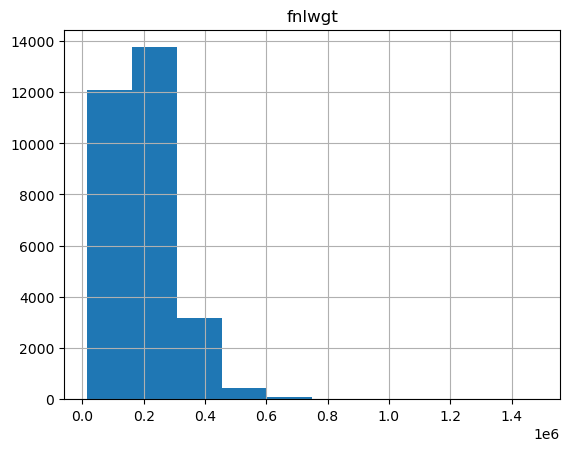

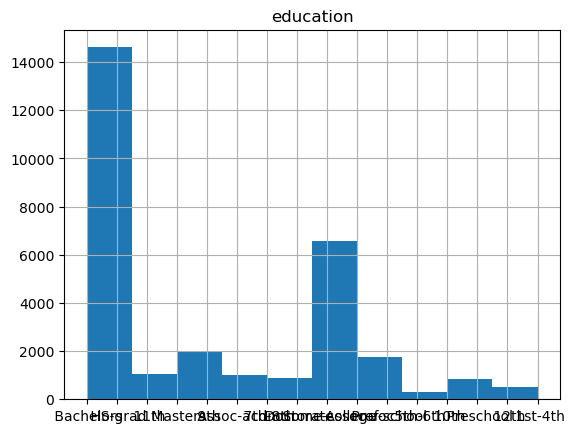

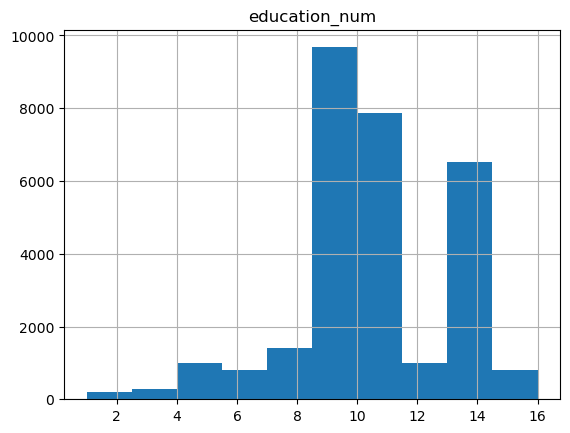

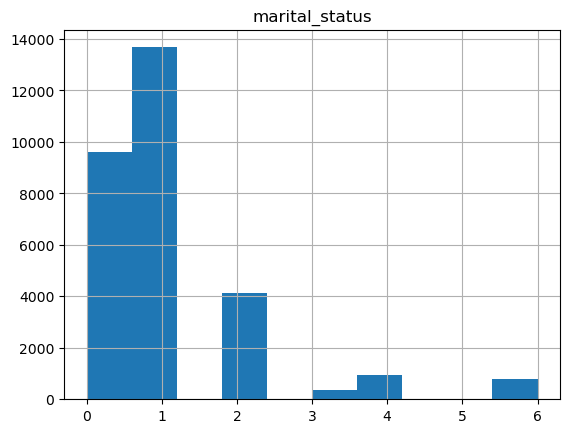

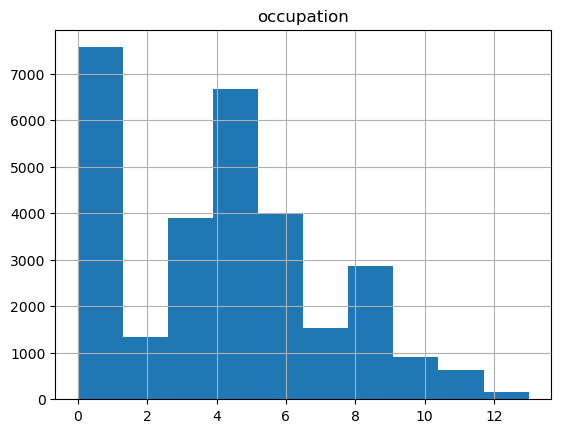

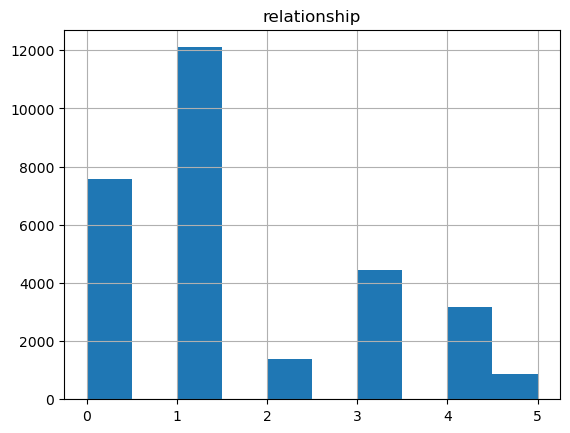

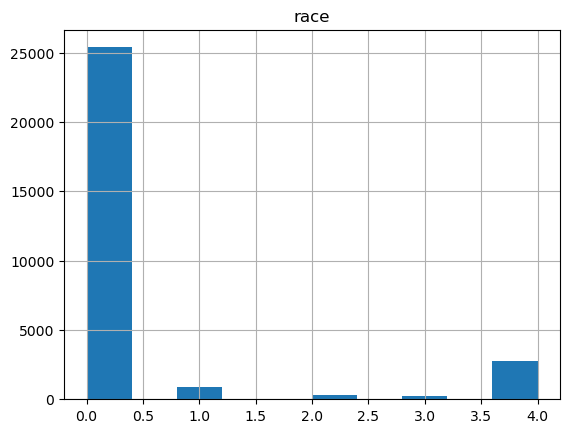

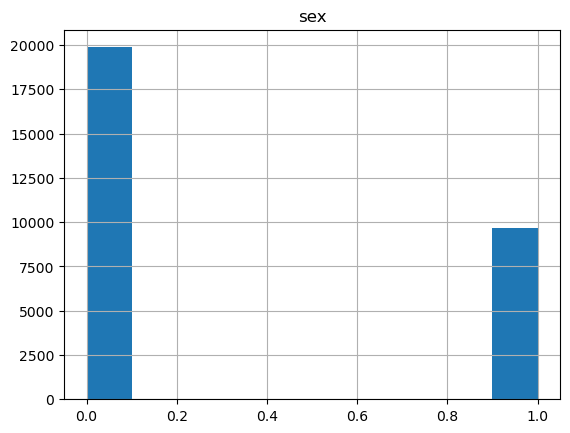

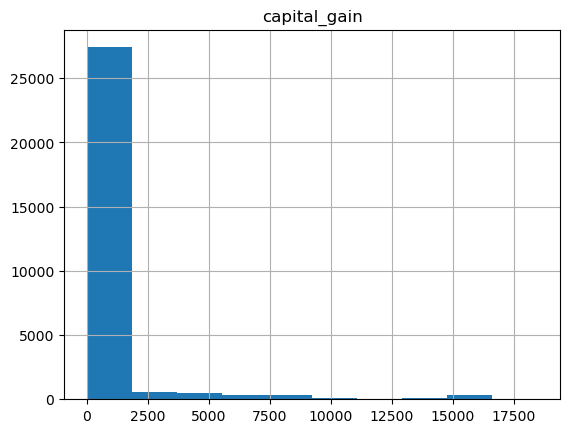

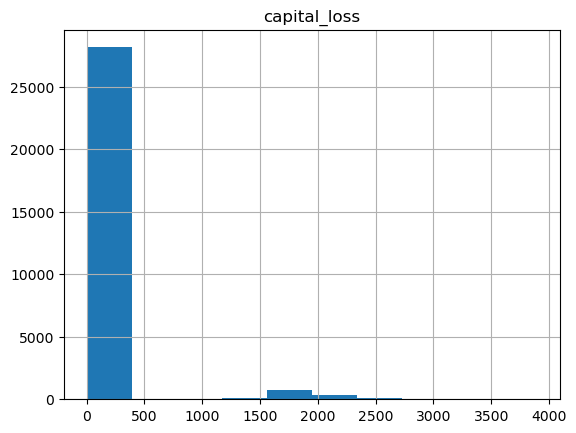

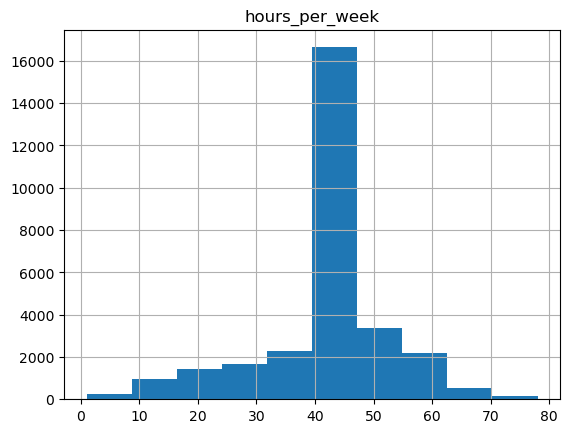

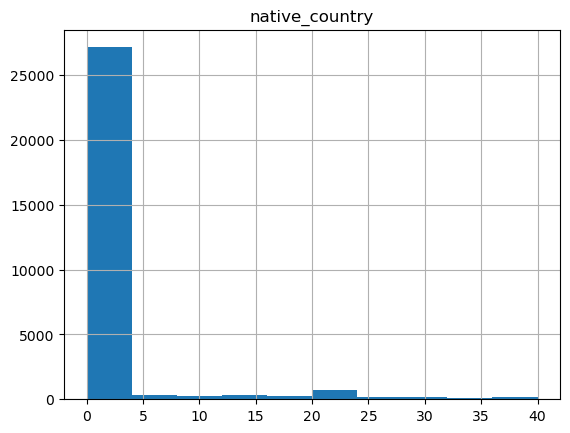

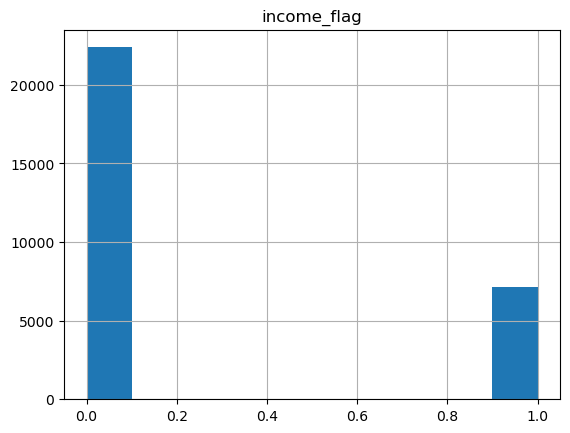

In [19]:
df_train = df_train[df_train['age']<=80]
df_train = df_train[df_train['workclass']!=999]
df_train = df_train[df_train['occupation']!=999]
df_train = df_train[df_train['native_country']!=999]
df_train = df_train[df_train['capital_gain']<=20000]
for col in df_train.columns:
    df_train[col].hist()
    plt.title(col)
    plt.show()

Correlation between categorical variables

In [20]:
##categorical variables with income_flag

from scipy.stats import chi2_contingency
categorical_cols = ['age','workclass','education_num','marital_status','occupation','relationship','race','sex','hours_per_week','native_country']

chi2_dict = {}

for col in categorical_cols:
    crosstab = pd.crosstab(df_train[col],df_train['income_flag'])
    stat, p, dof, expected = chi2_contingency(crosstab)
    #print(col +' :')
    #print(stat, p, dof)
    chi2_dict[col] = stat

#print(chi2_dict)
print(sorted(chi2_dict.items(),key = lambda x:x[1]))

[('race', 300.9978107356119), ('native_country', 302.1792715515518), ('workclass', 733.6236213039703), ('sex', 1362.2425734353644), ('hours_per_week', 2282.0374239665107), ('age', 3094.243261903238), ('occupation', 3523.0914142179063), ('education_num', 3806.5420733596548), ('marital_status', 5996.7148868144595), ('relationship', 6158.8257306345895)]


In [21]:
##categorical variables with each other

from scipy.stats import chi2_contingency
categorical_cols = ['age','workclass','education','education_num','marital_status','occupation','relationship','race','sex','hours_per_week','native_country']
chi2_pairs_dict = {}

for i in range(0,len(categorical_cols)+1):
    for j in range(i+1,len(categorical_cols)):
        crosstab = pd.crosstab(df_train[categorical_cols[i]],df_train[categorical_cols[j]])
        stat, p, dof, expected = chi2_contingency(crosstab)
        #print(categorical_cols[i] +' and ' + categorical_cols[j])
        k = categorical_cols[i] +' and ' + categorical_cols[j]
        chi2_pairs_dict[k] = stat
        #print(stat, p, dof)

print(sorted(chi2_pairs_dict.items(), key = lambda x:x[1]))

[('sex and native_country', 140.15929192914882), ('education_num and sex', 225.03501677115895), ('education and sex', 225.03501677115898), ('age and race', 349.1230321701977), ('workclass and race', 385.6762656191258), ('race and sex', 428.7279082532092), ('workclass and native_country', 481.6139922359419), ('age and sex', 484.1123949409973), ('workclass and sex', 591.3207353578865), ('education and race', 676.2281013473773), ('education_num and race', 676.2281013473773), ('race and hours_per_week', 800.1328959349813), ('occupation and race', 819.094530660993), ('marital_status and race', 825.9207681005071), ('marital_status and native_country', 1017.24904257232), ('workclass and marital_status', 1023.6018007206154), ('relationship and native_country', 1113.5825277027989), ('relationship and race', 1129.5896190447872), ('workclass and relationship', 1143.844636666233), ('education and marital_status', 1330.1948327578007), ('education_num and marital_status', 1330.1948327578007), ('educ

It is quite evident from the results above that education and education_num, marital status and relationship, race and country, education and occupation, age and marital status are highly correlated (as expected). 
So we might as well consider only truly independent columns like education_num (since education is anyway a similar ordinal variable), marital status and race. Age can be skipped because it can cause overfitting due to variance and its high correlation with other main attributes.

Age and hours per week is an interesting though obvious correlation, let's visualize this result below.

<AxesSubplot:xlabel='age', ylabel='hours_per_week'>

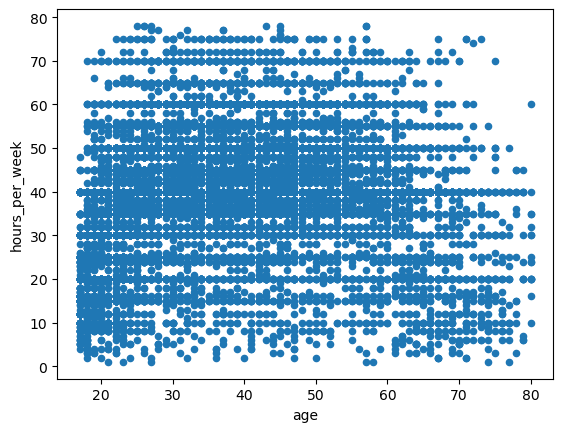

In [22]:
df_train[['age','hours_per_week']].plot.scatter(x = 'age', y= 'hours_per_week')

We can see that older people work lesser for more than 45 hours per week. Huge respect for the 80 year old working for 60 hours per week!

In [23]:
continuous_cols = df_train[['capital_gain','capital_loss','hours_per_week']]

continuous_cols.corr()


,capital_gain,capital_loss,hours_per_week
capital_gain,1.000000,-0.052773,0.095376
capital_loss,-0.052773,1.000000,0.056633
hours_per_week,0.095376,0.056633,1.000000


None of these continuous variables have overly strong correlation amongst themselves. Hence, we can consider all of them in our model, except age because we dismissed it earlier already.

In [24]:
df_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_flag
0,39,0,77516,Bachelors,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,Bachelors,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,HS-grad,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,11th,7,1,2,1,4,0,0,0,40,0,0
4,28,2,338409,Bachelors,13,1,3,2,4,1,0,0,40,12,0


The final feature list can be as follows

In [25]:
final_features = ['education_num','marital_status','race','capital_gain','capital_loss']
df_train[final_features]

,education_num,marital_status,race,capital_gain,capital_loss
0,13,0,0,2174,0
1,13,1,0,0,0
2,9,2,0,0,0
3,7,1,4,0,0
4,13,1,4,0,0
...,...,...,...,...,...
32556,12,1,0,0,0
32557,9,1,0,0,0
32558,9,6,0,0,0
32559,9,0,0,0,0


In [171]:
#df_train.to_csv('income_data.csv',index = False)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
logreg = LogisticRegression(fit_intercept=False, C=1e16, solver='liblinear')
# Creating a classifier pipeline 
clf = Pipeline([('ss', scaler), 
                ('log', logreg)])

X_train = df_train[final_features]
y_train = df_train['income_flag']

clf.fit(X_train,y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('log',
                 LogisticRegression(C=1e+16, fit_intercept=False,
                                    solver='liblinear'))])

In [43]:
# Get the train and test accuracy scores
print(f"Train Score: {clf.score(X_train, y_train)}")
#print(f"Test Score: {clf.score(X_test, y_test)}")

Train Score: 0.7461418708542034
